<a href="https://colab.research.google.com/github/joaquinhojman/Entrenamieto_ECI_2020/blob/main/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Como levantar un archivo desde colab? https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
#Repositorio: https://github.com/joaquinhojman/Entrenamieto_ECI_2020

# En el read_csv, castear las variables a los tipos que corresponden.
# En el usecols sacar: 
#     * 'Submitted_for_Approval' (Un solo valor: 0)
#     * 'Brand' (Muchos nulos: 15911)
#     * 'Product_Type' (Muchos nulos: 15935)
#     * 'Size' (Muchos nulos: 15967)
#     * 'Product_Category_B' (Muchos nulos: 15928)
#     * 'Price' (Muchos nulos; 15982)
#     * 'Currency' (Muchos nulos: 16052)
#     * 'Last_Activity' (Todos nulos)
#     * 'ASP_(converted)_Currency' (Un solo valor: 'USD')
#     * 'Actual_Delivery_Date' (Todos nulos)
#     * 'Prod_Category_A' (Un solo valor: 'Prod_Category_A_None')

url = 'https://raw.githubusercontent.com/joaquinhojman/Entrenamieto_ECI_2020/main/Entrenamieto_ECI_2020.csv'
df_frio_frio = pd.read_csv(url,\
                 usecols=['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',\
                        'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval', 'Bureaucratic_Code_0_Approved',\
                        'Bureaucratic_Code', 'Account_Created_Date', 'Source ', 'Billing_Country',\
                        'Account_Name', 'Opportunity_Name', 'Opportunity_ID', 'Sales_Contract_No', 'Account_Owner',\
                        'Opportunity_Owner', 'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',\
                        'Opportunity_Created_Date', 'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',\
                        'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP', 'ASP_(converted)',\
                        'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month', 'Delivery_Quarter',\
                        'Delivery_Year', 'TRF', 'Total_Amount_Currency', 'Total_Amount', 'Total_Taxable_Amount_Currency',\
                        'Total_Taxable_Amount', 'Stage'],\
                  dtype={
                        'Region' : 'category',
                        'Territory' : 'category',
                        'Bureaucratic_Code' : 'category',
                        'Source ' : 'category',
                        'Billing_Country' : 'category',
                        'Account_Name' : 'category',
                        'Opportunity_Name' : 'category',
                        'Account_Owner' : 'category',
                        'Opportunity_Owner' : 'category',
                        'Account_Type' : 'category',
                        'Opportunity_Type' : 'category',
                        'Quote_Type' : 'category',
                        'Delivery_Terms' : 'category',
                        'Last_Modified_By' : 'category',
                        'Product_Family' : 'category',
                        'Product_Name' : 'category',
                        'ASP_Currency' : 'category',
                        'Delivery_Quarter' : 'category',
                        'Total_Amount_Currency' : 'category',
                        'Total_Taxable_Amount_Currency' : 'category',
                        'Stage' : 'category'})
# Dataset is now stored in a Pandas Dataframe

df_frio_frio.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
0,27761,EMEA,None,1,1,1,1,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost
1,27760,EMEA,None,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won
2,27446,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won
3,16808,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost
4,16805,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost


In [ ]:
#cantidad de columnas de la abse
len(df_frio_frio.columns)

41

In [ ]:
#cantidad de filas de la base
len(df_frio_frio)

16947

In [ ]:
# Sacar espacio del nombre de la columna 'Source'
df_frio_frio.rename(columns={'Source ' : 'Source', 'ASP_(converted)' : 'ASP_(converted_USD)'}, inplace=True)

In [ ]:
# Poner en la columna Month sólo el mes (que no aparezca el año)
df_frio_frio['Month'] = pd.to_datetime(df_frio_frio['Month'], format='%Y - %m').dt.month

In [ ]:
# Pasar la columna 'Sales_Contract_No' a numérico (incluídos los nulos)
df_frio_frio['Sales_Contract_No'] = df_frio_frio['Sales_Contract_No'].replace('None', np.NaN)
df_frio_frio['Sales_Contract_No'] = df_frio_frio['Sales_Contract_No'].astype('float')

In [ ]:
# Pasar las columnas de fechas a formato datetime
formato_fecha = '%m/%d/%Y'
df_frio_frio['Account_Created_Date'] = pd.to_datetime(df_frio_frio['Account_Created_Date'], format=formato_fecha) # ver fecha fila 0
df_frio_frio['Opportunity_Created_Date'] = pd.to_datetime(df_frio_frio['Opportunity_Created_Date'], format=formato_fecha) # ver fecha fila 77
df_frio_frio['Quote_Expiry_Date'] = pd.to_datetime(df_frio_frio['Quote_Expiry_Date'], format=formato_fecha) # ver fecha fila 0
df_frio_frio['Last_Modified_Date'] = pd.to_datetime(df_frio_frio['Last_Modified_Date'], format=formato_fecha) # ver fecha fila 0
df_frio_frio['Planned_Delivery_Start_Date'] = pd.to_datetime(df_frio_frio['Planned_Delivery_Start_Date'], format=formato_fecha) # ver fechas filas 0 y 1, comparar el mes con month
df_frio_frio['Planned_Delivery_End_Date'] = pd.to_datetime(df_frio_frio['Planned_Delivery_End_Date'], format=formato_fecha) # ver fecha fila 0

In [ ]:
#Estadisticas de la base
df_frio_frio.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Opportunity_ID,Sales_Contract_No,ASP,ASP_(converted_USD),Month,Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
count,16947.000000,16947.000000,16947.000000,16947.000000,16947.000000,16947.000000,9974.000000,13738.000000,13738.000000,16947.000000,16947.000000,16947.000000,1.688800e+04,1.694700e+04
mean,17666.650440,0.807990,0.583584,0.475482,0.318876,5335.940225,2725.414979,7.012128,0.432554,6.400897,2017.137428,2.338172,1.993659e+06,3.224117e+06
std,6940.859372,0.393893,0.492979,0.499413,0.466055,3324.723809,1569.252469,18.858359,0.758659,3.379323,0.829603,12.169339,1.848426e+07,2.030360e+07
min,4854.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,0.000000,0.000000e+00,0.000000e+00
25%,11953.000000,1.000000,0.000000,0.000000,0.000000,2448.500000,1396.500000,0.360000,0.373260,3.000000,2016.000000,0.000000,2.677500e+04,8.546580e+04
50%,18114.000000,1.000000,1.000000,0.000000,0.000000,5306.000000,2801.500000,0.400000,0.412850,6.000000,2017.000000,0.000000,1.072500e+05,3.760672e+05
75%,23845.500000,1.000000,1.000000,1.000000,1.000000,7698.000000,4009.000000,0.505000,0.476490,9.000000,2018.000000,1.000000,4.603898e+05,1.037450e+06
max,28773.000000,1.000000,1.000000,1.000000,1.000000,12803.000000,6517.000000,80.000000,67.000000,12.000000,2020.000000,500.000000,1.320000e+09,1.356339e+09


In [ ]:
#informacion sobre las columnas de la base
df_frio_frio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  category      
 2   Territory                           16947 non-null  category      
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64         
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64         
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64         
 7   Bureaucratic_Code                   16947 non-null  category      
 8   Account_Created_Date                16947 non-null  datetime64[ns]
 9   Source                              16947 non-null  category      
 10  Billing_Country       

In [ ]:
# Me interesa ver la distribucion de las ventas exitosas y fallidas en el tiempo
# empiezo con las ventas exitosas
df_exito = df_frio_frio[['Stage','Planned_Delivery_Start_Date']] # dejo solo las columas que me interesan
df_exito = df_exito[df_exito['Stage'] == 'Closed Won']  # dejo solo los closed won
df_exito

,Stage,Planned_Delivery_Start_Date
1,Closed Won,2016-01-18
2,Closed Won,2016-01-25
7,Closed Won,2016-01-25
23,Closed Won,2016-01-09
63,Closed Won,2016-01-18
...,...,...
16937,Closed Won,2016-02-01
16939,Closed Won,2016-04-01
16942,Closed Won,2016-03-21
16943,Closed Won,2016-04-04


Text(0, 0.5, 'Densidad')

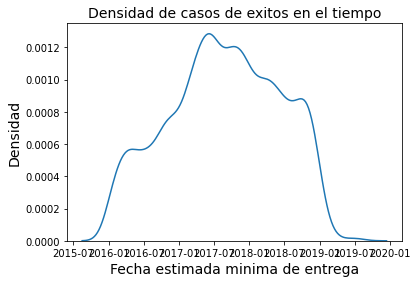

In [ ]:
#Grafico los exitos en el tiempo

g = sns.kdeplot(df_exito["Planned_Delivery_Start_Date"])
g.set_title("Densidad de casos de exitos en el tiempo", fontsize=14)
g.set_xlabel("Fecha estimada minima de entrega", fontsize=14)
g.set_ylabel("Densidad", fontsize=14)

In [ ]:
#Ahora buscamos ver las ventas fallidas en funcion del tiempo
df_fracaso = df_frio_frio[['Stage','Planned_Delivery_Start_Date']] #dejo solo las columas que me interesan
df_fracaso = df_fracaso[df_fracaso['Stage'] == 'Closed Lost']  #dejo solo los closed won
df_fracaso

,Stage,Planned_Delivery_Start_Date
0,Closed Lost,2016-05-01
3,Closed Lost,2018-02-01
4,Closed Lost,2018-02-01
5,Closed Lost,2018-02-01
6,Closed Lost,2017-02-01
...,...,...
16938,Closed Lost,2016-08-15
16940,Closed Lost,2016-10-03
16941,Closed Lost,2016-10-03
16945,Closed Lost,2016-04-25


Text(0, 0.5, 'Densidad')

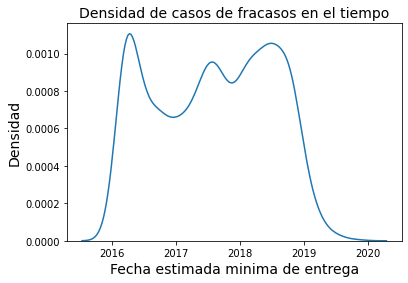

In [ ]:
#Grafico los fracasos en el tiempo

g = sns.kdeplot(df_fracaso["Planned_Delivery_Start_Date"])
g.set_title("Densidad de casos de fracasos en el tiempo", fontsize=14)
g.set_xlabel("Fecha estimada minima de entrega", fontsize=14)
g.set_ylabel("Densidad", fontsize=14)

In [ ]:
#Tambien quiero explorar como se distribuyen los exitos por cada Region.

df_region = df_frio_frio[['Stage','Region']] #dejo solo las columas que me interesan

exitos_region = df_region[df_region['Stage'] == 'Closed Won']  #dejo solo los closed won
exitos_region = exitos_region.groupby('Region').size() 
exitos_region

Region
APAC           1896
Americas       1793
EMEA           2471
Japan          3323
Middle East      50
dtype: int64

Text(0, 0.5, 'Cantidad éxitos')

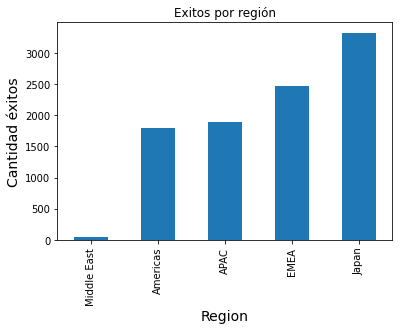

In [ ]:
g = exitos_region.nsmallest().plot.bar()
g.set_title("Exitos por región")
g.set_xlabel("Region", fontsize=14)
g.set_ylabel("Cantidad éxitos", fontsize=14)


In [ ]:
#Ahora hago lo mismo pero con los fracasos por cada Region.

fracasos_region = df_region[df_region['Stage'] == 'Closed Lost']  #dejo solo los closed lost
fracasos_region = fracasos_region.groupby('Region').size() 
fracasos_region

Region
APAC           1355
Americas       2140
EMEA           2189
Japan          1546
Middle East     120
dtype: int64

Text(0, 0.5, 'Cantidad fracasos')

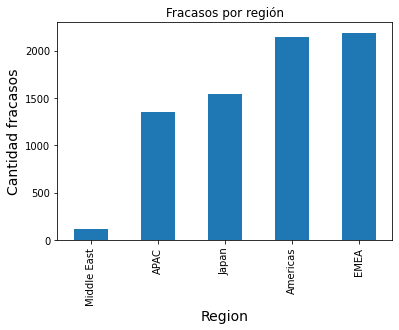

In [ ]:
g = fracasos_region.nsmallest().plot.bar()
g.set_title("Fracasos por región")
g.set_xlabel("Region", fontsize=14)
g.set_ylabel("Cantidad fracasos", fontsize=14)


In [ ]:
#Nos interesa saber si el precio es un factor determinante a la hora de cerrar una venta.
#Para eso analizaremos como se distribuyen los exitos y los fracasos en función de la variación de precio.

stage_precio = df_frio_frio[['ID','Stage','Total_Amount','Total_Amount_Currency', 'Opportunity_ID']]
stage_precio

,ID,Stage,Total_Amount,Total_Amount_Currency,Opportunity_ID
0,27761,Closed Lost,5272800.00,EUR,0
1,27760,Closed Won,48230.00,EUR,1
2,27446,Closed Won,83865.60,USD,2
3,16808,Closed Lost,7421881.50,USD,3
4,16805,Closed Lost,13357192.50,USD,4
...,...,...,...,...,...
16942,8781,Closed Won,103350.00,EUR,12801
16943,8786,Closed Won,93015.00,EUR,12801
16944,8792,Closed Won,103350.00,EUR,12801
16945,28561,Closed Lost,2346796.88,USD,12802


In [ ]:
#No nos sirve en diferentes monedas, conviene convertir todo a dolares.
#Que monedas hay en el df?
stage_precio['Total_Amount_Currency'].values


['EUR', 'EUR', 'USD', 'USD', 'USD', ..., 'EUR', 'EUR', 'EUR', 'USD', 'USD']
Length: 16947
Categories (5, object): ['AUD', 'EUR', 'GBP', 'JPY', 'USD']

In [ ]:
# Vemos que las monedas son [AUD, EUR, GBP, JPY, USD]
# Vamos a trabajar en Dolares (USD), usando https://themoneyconverter.com/ES/ al 13/10/2020 obtenemos:
change_USD = 1 #1 dolar EEUU = 1 dolar EEUU
change_EUR = 1.1745 #1 euro = 1,1745 dolares EEUU
change_AUD = 0.71601 # 1 dolar australiano = 0.71601 dolar EEUU
change_JPY = 0.0094800 # 1 yen japones = 0,0094800 dolares EEUU
change_GBP = 1.935 # 1 libra esterlina = 1,2935 dolares EEUU
# Suponemos que la moneda de ninguno de estos paises o zonas (Estados Unidos, Japon, La Unión Europea, Gran Bretaña, 
# Australia) tuvo una inflación/deflación suficientemente significativa por lo cual el tipo de cambio utilizado es
# representativo a pesar de haber sufrido ligeras variaciones en los años que aparecen en la tabla.

In [ ]:
#filtramos los datos por moneda
filtro_USD = stage_precio['Total_Amount_Currency'] == 'USD'
filtro_EUR = stage_precio['Total_Amount_Currency'] == 'EUR'
filtro_AUD = stage_precio['Total_Amount_Currency'] == 'AUD'
filtro_JPY = stage_precio['Total_Amount_Currency'] == 'JPY'
filtro_GBP = stage_precio['Total_Amount_Currency'] == 'GBP'

In [ ]:
#creamos una df separando por moneda
df_USD = stage_precio[filtro_USD]
df_EUR = stage_precio[filtro_EUR]
df_AUD = stage_precio[filtro_AUD]
df_JPY = stage_precio[filtro_JPY]
df_GBP = stage_precio[filtro_GBP]


In [ ]:
#aplicamos los cambios de moneda

df_USD.loc[:, 'Total_Amount'] = df_USD['Total_Amount']*change_USD
df_EUR.loc[:, 'Total_Amount'] = df_EUR['Total_Amount']*change_EUR
df_AUD.loc[:, 'Total_Amount'] = df_AUD['Total_Amount']*change_AUD
df_JPY.loc[:, 'Total_Amount'] = df_JPY['Total_Amount']*change_JPY
df_GBP.loc[:, 'Total_Amount'] = df_GBP['Total_Amount']*change_GBP

#Ahora uno los data frames con los cambios hechos
df_changed = df_USD.append(df_EUR).append(df_AUD).append(df_JPY).append(df_GBP).drop(['Total_Amount_Currency'], axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
df_changed_exitos = df_changed[df_changed['Stage'] == 'Closed Won']
agrupado_por_op_ID = df_changed_exitos.groupby('Opportunity_ID').agg({'Total_Amount' : 'sum'})
agrupado_por_op_ID = agrupado_por_op_ID.reset_index()

In [ ]:
agrupado_por_total_amount = agrupado_por_op_ID.groupby('Total_Amount').agg({'Opportunity_ID' : 'count'})
agrupado_por_total_amount.columns = ['Cantidad_de_ventas_por_precio']
agrupado_por_total_amount = agrupado_por_total_amount.reset_index()
agrupado_por_total_amount

,Total_Amount,Cantidad_de_ventas_por_precio
0,0.000000e+00,5
1,1.761750e-01,1
2,9.954000e+00,1
3,4.171200e+01,2
4,5.688000e+01,8
...,...,...
3971,2.362878e+07,1
3972,2.454489e+07,1
3973,3.105361e+07,1
3974,4.183522e+07,1


Text(0, 0.5, 'Ventas exitosas')

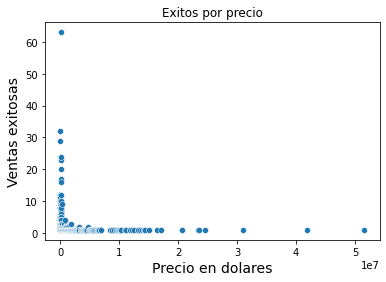

In [ ]:
# Finalmente obvtuvimos un data frame con los precios en dolares y el estado final de la ventas
# Ahora podemos observar si los precios mas altos tienen mas ventas fallidas.
# Primero graficamos las ventas exitosas y despues veremos las fallidas

# sns.set(rc={'figure.figsize':(11.7,8.27)})  #para cambiar el tamaño de los gráficos de seaborn. No lo hagan porque no queda bien la escala

g = sns.scatterplot(x="Total_Amount", y="Cantidad_de_ventas_por_precio", data=agrupado_por_total_amount, sizes=(80, 400))
g.set_title("Exitos por precio")
g.set_xlabel("Precio en dolares", fontsize=14)
g.set_ylabel("Ventas exitosas", fontsize=14)

In [ ]:
df_changed[df_changed['Stage'] == 'Closed Won']

,ID,Stage,Total_Amount,Opportunity_ID
2,27446,Closed Won,8.386560e+04,2
7,27455,Closed Won,5.068800e+04,7
23,28524,Closed Won,1.621851e+06,11
64,19342,Closed Won,3.184974e+06,21
77,4937,Closed Won,3.920000e+03,29
...,...,...,...,...
16919,21317,Closed Won,3.054627e+04,12784
16923,27689,Closed Won,1.155991e+05,12786
16924,27688,Closed Won,1.133761e+05,12787
16925,19062,Closed Won,1.662508e+05,12788


Text(0, 0.5, 'Ventas fracasadas')

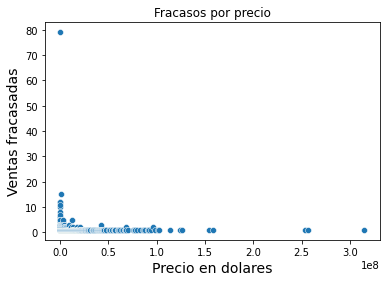

In [ ]:
#Ahora veremos las fallidas

precio_fracaso = df_changed[df_changed['Stage'] == 'Closed Lost']  #dejo solo los closed lost
agrupado_por_op_ID = precio_fracaso.groupby('Opportunity_ID').agg({'Total_Amount' : 'sum'})
agrupado_por_op_ID = agrupado_por_op_ID.reset_index()

agrupado_por_total_amount = agrupado_por_op_ID.groupby('Total_Amount').agg({'Opportunity_ID' : 'count'})
agrupado_por_total_amount.columns = ['Cantidad_de_ventas_por_precio']
agrupado_por_total_amount = agrupado_por_total_amount.reset_index()
agrupado_por_total_amount

#g = sns.scatterplot(x="ID", y="Total_Amount", data=precio_fracaso, color="Red")
#g.set_title("Fracaso por precio")
#g.set_xlabel("Ventas Fracasadas",fontsize=14)
#g.set_ylabel("Precio en dolares",fontsize=14)

g = sns.scatterplot(x="Total_Amount", y="Cantidad_de_ventas_por_precio", data=agrupado_por_total_amount, sizes=(80, 400))
g.set_title("Fracasos por precio")
g.set_xlabel("Precio en dolares",fontsize=14)
g.set_ylabel("Ventas fracasadas",fontsize=14)

In [ ]:
#Los graficos observados no son concluyentes, el exito de la venta no parece depender del precio.

In [ ]:
# Ver relación entre 'TRF' y 'Product_Name'
relacion_producto_potencia = df_frio_frio.groupby('Product_Name').agg({'TRF' : 'value_counts'})
relacion_producto_potencia = relacion_producto_potencia.unstack()   # en el índice queda solo el nombre del producto
aparece_cada_prod_una_vez = relacion_producto_potencia.index.is_unique
aparece_cada_prod_una_vez

True

In [ ]:
df_frio_frio.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted_USD),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
0,27761,EMEA,None,1,1,1,1,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,NaN,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,2016-01-30,2016-06-13,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,0.58817,2016-05-01,2016-06-30,5,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost
1,27760,EMEA,None,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39.0,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,2016-01-20,2016-01-15,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,0.59948,2016-01-18,2016-01-20,1,Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won
2,27446,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760.0,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,2016-09-30,2016-09-29,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,0.48000,2016-01-25,2016-01-25,1,Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won
3,16808,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,NaN,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,NaT,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,0.53000,2018-02-01,2018-03-31,2,Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost
4,16805,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,NaN,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,0.53000,2018-02-01,2018-02-28,2,Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost


Nos interesa saber como estan relacionados el precio de un producto y su potencia. Ademas veremos algunos detalles particulares sobre la potencia de los productos mediante una serie de graficos y calculos.

In [4]:

potenciaXprecio = df_frio_frio[['TRF','Total_Amount']].rename(columns={'TRF': 'Total_Power'}) #Potencia por precio 
potenciaXprecio 

,Total_Power,Total_Amount
0,10,5272800.00
1,0,48230.00
2,0,83865.60
3,14,7421881.50
4,25,13357192.50
...,...,...
16942,0,103350.00
16943,0,93015.00
16944,0,103350.00
16945,4,2346796.88


In [5]:
#Notamos que hay muchas filas que tienen potencia cero
#No suponemos esto un error, sino que se trata de productos en los que la potencia no aplica.
#Por ejemplo: Un aire acondicionado tiene potencia, un soporte para ponerlo en la pared no la tiene.
#Nos interesan todas las ventas de la empresa, por lo tanto no removemos aquellas sin potencia.

#Antes de graficar, hacemos algunos analisis de la potencia

max(potenciaXprecio['Total_Power']) #Potencia Maxima

500

In [6]:
min(potenciaXprecio['Total_Power']) #Potencia Minima

0

In [7]:
(potenciaXprecio['Total_Power']).count() #cantidad de potencias, vemos que no hay nulos

16947

In [8]:
sum(potenciaXprecio['Total_Power'])/(potenciaXprecio['Total_Power']).count() #promedio de potencia

2.3381719478373753

Text(0, 0.5, 'Precio total')

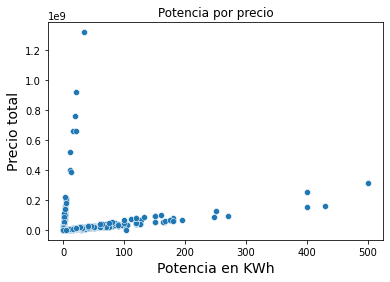

In [10]:
#Graficamos en un scatter plot la potencia por precio

g = sns.scatterplot(x="Total_Power", y="Total_Amount", data=potenciaXprecio, sizes=(80, 400))
g.set_title("Potencia por precio")
g.set_xlabel("Potencia en KWh", fontsize=14)
g.set_ylabel("Precio total", fontsize=14)

### De esta visualización podemos inferir que en lineas generales, los productos aumentan su precio segun la potencia. Es decir a mayor potencia, mayor precio. Tambien vemos que la mayor cantidad de ventas se agrupan en torno a una potencia de hasta 200 KWh, siendo su punto de mayor densidad el de 0 KWh. El aumento visualizado es practicamente lineal.
### Sin embargo tambien notamos ciertos productos de relativa baja potencia con precios muy altos. Analizaremos luego este caso, para ver que esta ocurriendo.


In [11]:
#Antes nos interesaria saber algunos datos solamente de los productos que tienen potencia. Para ello removemos los productos
#con potencia 0

filtro_potencia = potenciaXprecio['Total_Power'] > 0
potenciaXprecio_sinceros = potenciaXprecio[filtro_potencia]
potenciaXprecio_sinceros

,Total_Power,Total_Amount
0,10,5272800.00
3,14,7421881.50
4,25,13357192.50
5,28,14838277.50
6,7,2659494.60
...,...,...
16939,1,401700.00
16940,20,10751580.00
16941,20,10580920.00
16945,4,2346796.88


In [12]:
min(potenciaXprecio_sinceros['Total_Power']) #Potencia Minima

1

In [13]:
(potenciaXprecio_sinceros['Total_Power']).count() #Cantidad de elementos 

4976

In [14]:
#Cantidad de productos con potencia 0
(potenciaXprecio['Total_Power']).count() - (potenciaXprecio_sinceros['Total_Power']).count()

11971

In [16]:
#promedio de potencias distintas de cero
sum(potenciaXprecio_sinceros['Total_Power'])/(potenciaXprecio_sinceros['Total_Power']).count() 

7.96322347266881

### Logicamente, y como esperabamos, el promedio de potencia sube cuando removemos las potencias iguales a cero. Notamos que tan solo cerca de 1/3 de los productos tienen una potencia asociada.

In [17]:
#Notamos de la grafica anterior que la mayoria de los productos se nuclean en potencias menores a 100KWh
#Queremos ver cuantos de estos productos tienen esa caracteristica

filtro0_100 = potenciaXprecio_sinceros['Total_Power'] < 100 
potencias0_100 = potenciaXprecio_sinceros[filtro0_100]['Total_Power']
potencias0_100.count()

4925

In [18]:
#Es decir que aquellos productos con potencias mayores a 100 son (dentro de los que tienen potencia):
(potenciaXprecio_sinceros['Total_Power']).count() - potencias0_100.count()

51

In [19]:
#Vemos que casi todos los productos con potencia la tienen entre 0-100. Queremos ver dentro de ese rango como
#se distribuye la potencia

potencias0_100

0        10
3        14
4        25
5        28
6         7
         ..
16939     1
16940    20
16941    20
16945     4
16946    40
Name: Total_Power, Length: 4925, dtype: int64

Text(0, 0.5, 'Densidad')

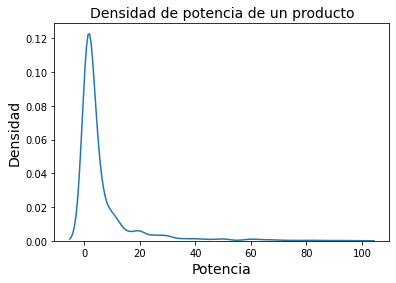

In [21]:
g = sns.kdeplot(potencias0_100)
g.set_title("Densidad de potencia de un producto", fontsize=14)
g.set_xlabel("Potencia", fontsize=14)
g.set_ylabel("Densidad", fontsize=14)

### De este nuevo grafico inferimos lo esperado: la mayor densidad de potencias, el 25%, se agrupan en torno al cero, es decir con baja potencia cercana al cero. Recordemos que habiamos quitado las potencias cero para este analisis.
### ¿Por que esperabamos este resultado? Porque cuando calculamos el promedio este nos habia dado aproximadamente 7, es decir bastante mas cercano al 0 que al 500, que era la potencia maxima.

Text(0, 0.5, 'Densidad')

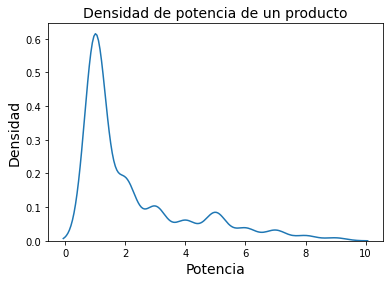

In [23]:
#Mostraremos una nueva medición, muy parecida a la anterior pero solo para las potencias entre 0 y 10:

filtro0_10 = potenciaXprecio_sinceros['Total_Power'] < 10
potencias0_10 = potenciaXprecio_sinceros[filtro0_10]['Total_Power']

g = sns.kdeplot(potencias0_10)
g.set_title("Densidad de potencia de un producto", fontsize=14)
g.set_xlabel("Potencia", fontsize=14)
g.set_ylabel("Densidad", fontsize=14)

### De este grafico mucho mas pequeño en escala, vemos que el 70% de las potencias toma como valor 1KWh, concluyendo asi que la mayoria de los productos tienen una potencia baja. 

In [25]:
# Cuantos productos tienen potencia 1KWh? (Agrupamos las potencias decimales entre 0 y 2)

filtro1 = (potenciaXprecio_sinceros['Total_Power'] > 0)& (potenciaXprecio_sinceros['Total_Power'] < 2)
potencias1 = potenciaXprecio_sinceros[filtro1]['Total_Power'].count()
potencias1

2192

### La cantidad total de productos con potencia era 4976, y los que tienen potencia 1 son 2912. Es facil notar que mas de la mitad de los productos con potencias distintas de cero tinen potencia = 1KWh

### En el grafico de potencias por precio presentado mas arriba, habiamos notamos ciertos productos de relativa baja potencia con precios muy altos. Queremos visualizar los datos mas detalladamente para ver si notamos alguna irregularidad.
### Notamos que estas irregularidades parecen estar bajo potencias menores a 100KWh

In [26]:
#Removemos los datos que no nos interesan
filtro100 = potenciaXprecio['Total_Power'] < 100 
potenciasXprecio100 = potenciaXprecio[filtro100]
potenciasXprecio100

,Total_Power,Total_Amount
0,10,5272800.00
1,0,48230.00
2,0,83865.60
3,14,7421881.50
4,25,13357192.50
...,...,...
16942,0,103350.00
16943,0,93015.00
16944,0,103350.00
16945,4,2346796.88


In [28]:
potenciasXprecio100.nlargest(20,'Total_Amount')

,Total_Power,Total_Amount
16063,33,1.320000e+09
5310,20,9.199924e+08
15641,19,7.600000e+08
5309,15,6.600053e+08
15784,20,6.600046e+08
5304,11,5.231387e+08
15459,10,4.000000e+08
16089,13,3.898800e+08
16716,3,2.211300e+08
2179,4,2.162400e+08


### A simple vista, no notamos ninguna irregularidad con estos valores. Sin mas detalles acerca del producto, no podemos decidir si estos datos son erroneos o acertados.